<a href="https://colab.research.google.com/github/TasnimIsrakSynthia/CSE474-ML-/blob/main/CSE475_lab_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unzip the file **




In [ ]:
import zipfile

# Path to the zip file
zip_path = '/content/MangoLeafBD Dataset.zip'  # Replace with the actual path to the zip file
extracted_path = 'path/to/extract/directory/'  # Replace with the desired extraction path

# Extracting the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

print("Files extracted successfully!")

Files extracted successfully!


In [ ]:
!pip install numpy scikit-learn pillow

In [ ]:
from PIL import Image
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Basic Information About the Dataset
Check the dataset’s shape, label distribution, and any potential issues like missing data or duplicates.

In [ ]:
# Number of images and labels
print("Number of samples in dataset:", len(labels))

# Unique classes
unique_classes, class_counts = np.unique(labels, return_counts=True)
print("Classes:", unique_classes)
print("Class distribution:", dict(zip(unique_classes, class_counts)))

Number of samples in dataset: 4000
Classes: ['Anthracnose' 'Bacterial Canker' 'Cutting Weevil' 'Die Back' 'Gall Midge'
 'Healthy' 'Powdery Mildew' 'Sooty Mould']
Class distribution: {'Anthracnose': 500, 'Bacterial Canker': 500, 'Cutting Weevil': 500, 'Die Back': 500, 'Gall Midge': 500, 'Healthy': 500, 'Powdery Mildew': 500, 'Sooty Mould': 500}


# Visualize Sample Images from Each Class
Visualizing a few sample images from each class helps understand what the model will try to distinguish.

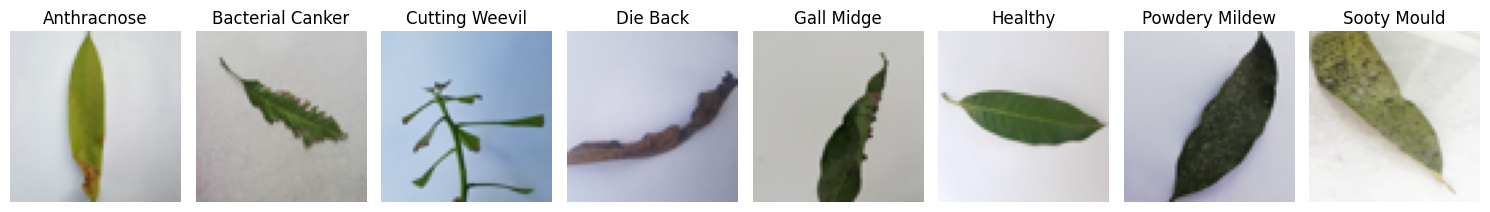

In [ ]:
import matplotlib.pyplot as plt
import random

# Plot sample images from each class
fig, axes = plt.subplots(1, len(unique_classes), figsize=(15, 5))
for i, class_name in enumerate(unique_classes):
    # Find an image from the class
    class_indices = np.where(labels == class_name)[0]
    sample_index = random.choice(class_indices)
    img = data[sample_index].reshape(64, 64, 3)  # Reshape to original 64x64x3

    axes[i].imshow(img.astype('uint8'))
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# **Perform EDA**






# Check for Class Imbalance
Since Decision Trees are sensitive to imbalanced data, check if any classes are underrepresented.

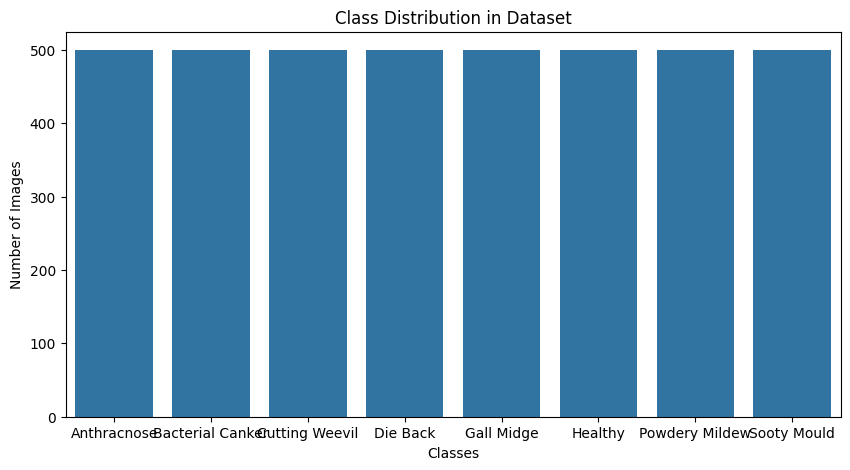

In [ ]:
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=unique_classes, y=class_counts)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Dataset")
plt.show()

# Apply PCA
Since images are high-dimensional data, checking feature correlations can be challenging. For simplicity, let’s use PCA to reduce dimensionality and see if clusters form by class.

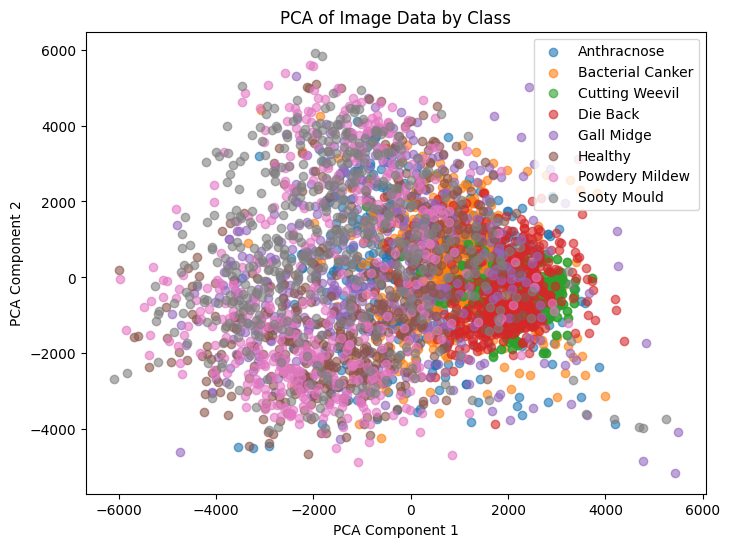

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2 components for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Plot PCA
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(unique_classes):
    plt.scatter(data_pca[labels == class_name, 0], data_pca[labels == class_name, 1], label=class_name, alpha=0.6)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of Image Data by Class")
plt.legend()
plt.show()

# Image Similarity Analysis
If the dataset has a mix of similar classes, analyzing feature similarity  can help identify overlapping categories, which might affect Decision Tree splits.

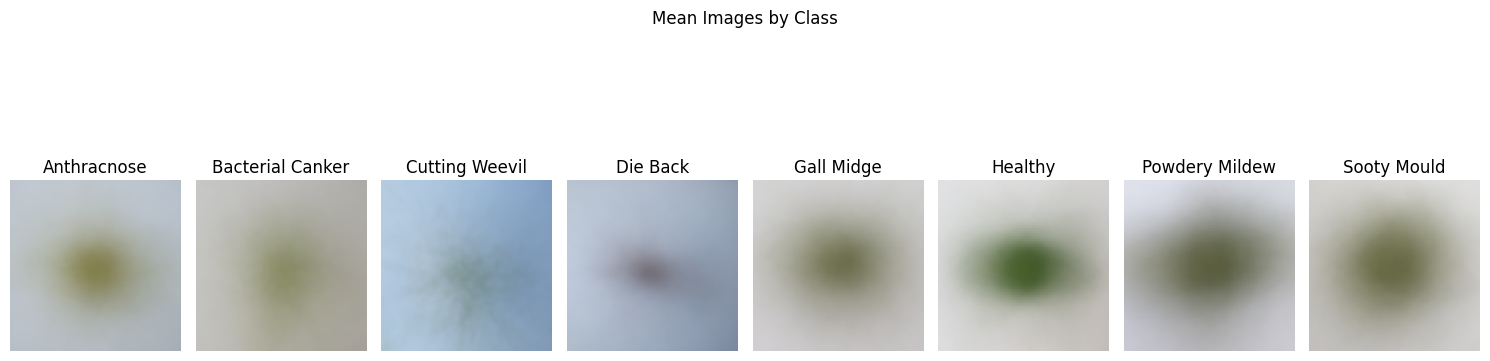

In [ ]:
# Calculate mean pixel values by class
class_means = {}
for class_name in unique_classes:
    class_means[class_name] = data[labels == class_name].mean(axis=0).reshape(image_size + (3,))

# Plot mean images for each class
fig, axes = plt.subplots(1, len(unique_classes), figsize=(15, 5))
for i, class_name in enumerate(unique_classes):
    axes[i].imshow(class_means[class_name].astype('uint8'))
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.suptitle("Mean Images by Class")
plt.tight_layout()
plt.show()


# Load and Preprocess the Images
In this step, we'll resize each image to 64x64 pixels, flatten it into a 1D array, and store the label based on the folder name.

In [ ]:
# Define image size for resizing
image_size = (64, 64)
data = []
labels = []

# Specify your dataset folder path
dataset_folder_path = "/content/path/to/extract/directory/MangoLeafBD Dataset"

# Loop through each class folder
for class_label in os.listdir(dataset_folder_path):
    class_folder = os.path.join(dataset_folder_path, class_label)
    if os.path.isdir(class_folder):  # Ensure it's a folder
        for image_file in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_file)
            try:
                # Open, resize, and convert to RGB
                img = Image.open(image_path).resize(image_size).convert('RGB')
                img_array = np.array(img).flatten()  # Flatten the 64x64x3 image to a 1D array
                data.append(img_array)
                labels.append(class_label)  # Label from folder name
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Convert lists to numpy arrays for easier processing
data = np.array(data)
labels = np.array(labels)
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Data shape: (4000, 12288)
Labels shape: (4000,)


# Split the Data
We'll split the data into training and test sets.

In [ ]:
# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (3200, 12288)
Test set shape: (800, 12288)


# Train the Decision Tree Classifier
Now, we’ll train a decision tree classifier on the training data.

In [ ]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)
print("Model training complete.")

Model training complete.


# Accuracy of Decision Tree
Evaluate the model on the test set to check its accuracy.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define a parameter grid to search over
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Create the base model
clf = DecisionTreeClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Train Decision Tree with the best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = best_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Decision Tree Accuracy: {accuracy * 100:.2f}%")


Best Parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimized Decision Tree Accuracy: 68.75%


In [ ]:
# Initialize Decision Tree with preset pruning values
pruned_clf = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
pruned_clf.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_pruned = pruned_clf.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"Pruned Decision Tree Accuracy: {accuracy_pruned * 100:.2f}%")


# Plot the Decision Tree

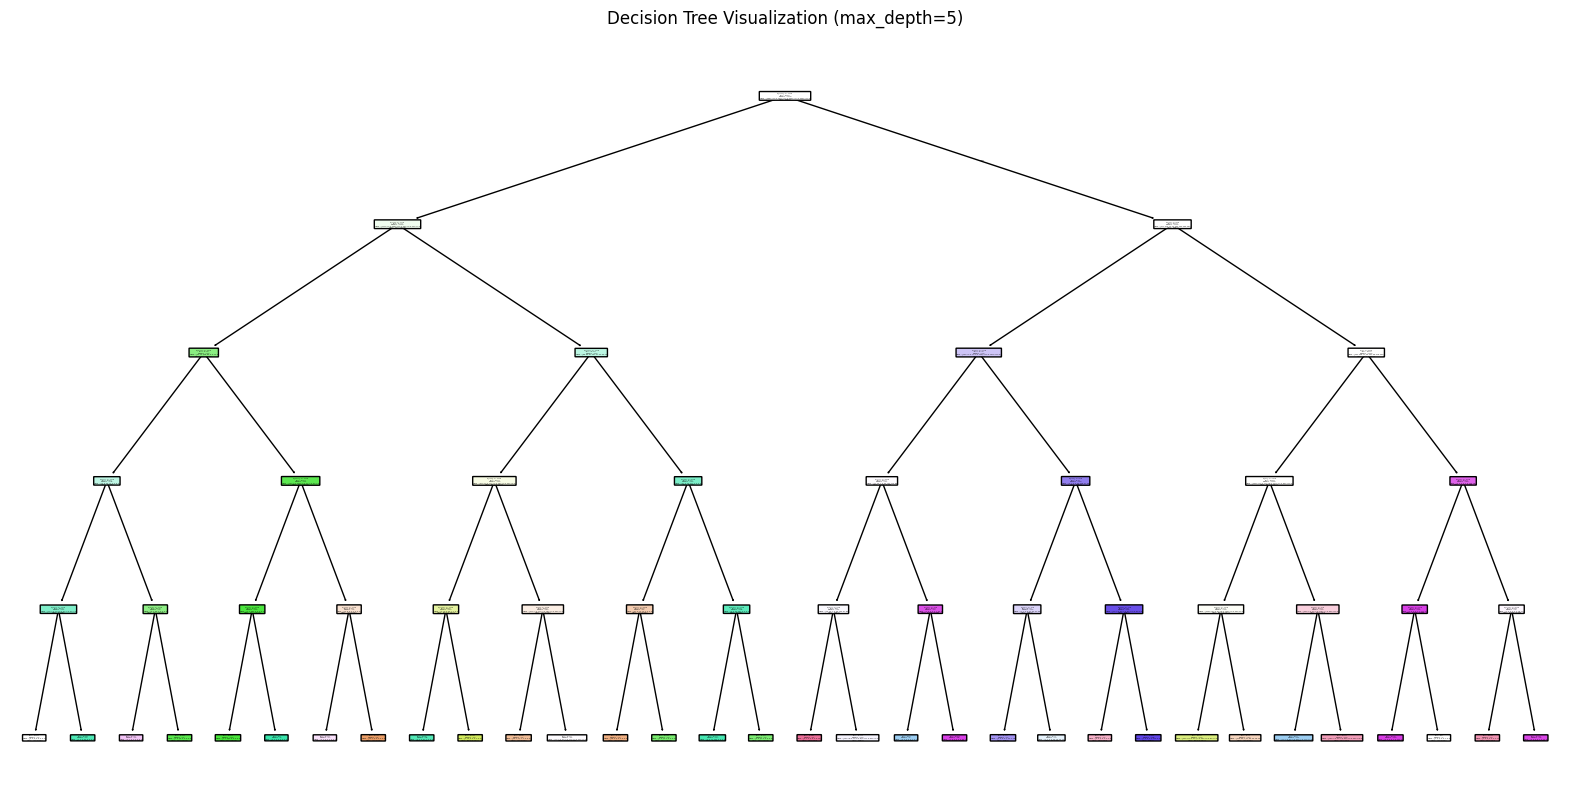

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train a smaller Decision Tree for better visualization
clf_small = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_small.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(clf_small, filled=True, feature_names=None, class_names=np.unique(y_train), rounded=True)
plt.title("Decision Tree Visualization (max_depth=5)")
plt.show()


#  Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest Classifier
Use the same training and test data split from before, and then train the Random Forest model.

In [ ]:
# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees

# Train the model
rf_clf.fit(X_train, y_train)
print("Random Forest model training complete.")

Random Forest model training complete.


# Accuracy of Random Forest Model
Now, let’s predict on the test set and calculate the accuracy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define a parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# Randomized search with 10 iterations and 5-fold cross-validation
random_search_rf = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_dist,
                                      n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)

# Get the best model
best_rf_clf = random_search_rf.best_estimator_
print("Best Parameters from RandomizedSearchCV:", random_search_rf.best_params_)

# Predict on the test set with the best model
y_pred_rf = best_rf_clf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Optimized Random Forest Accuracy: {accuracy_rf * 100:.2f}%")


Best Parameters from RandomizedSearchCV: {'n_estimators': 200, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 20}
Optimized Random Forest Accuracy: 89.75%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define a refined hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_grid,
                                   n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best model from the search
best_rf_clf = random_search.best_estimator_
print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)

# Predict on the test set with the best model
y_pred_rf = best_rf_clf.predict(X_test)

# Calculate and display accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Optimized Random Forest Model Accuracy: {accuracy_rf * 100:.2f}%")

# Display a detailed classification report
print("Classification Report for Optimized Random Forest:")
print(classification_report(y_test, y_pred_rf))


In [ ]:
from sklearn.model_selection import cross_val_score

# Run cross-validation on the optimized model for stability check
cv_scores_rf = cross_val_score(best_rf_clf, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)

# Calculate the mean cross-validated accuracy
mean_cv_accuracy_rf = np.mean(cv_scores_rf)
print(f"Cross-Validated Accuracy for Optimized Random Forest: {mean_cv_accuracy_rf * 100:.2f}%")


Cross-Validated Accuracy for Optimized Random Forest: 87.81%


# Plot the Random Forest

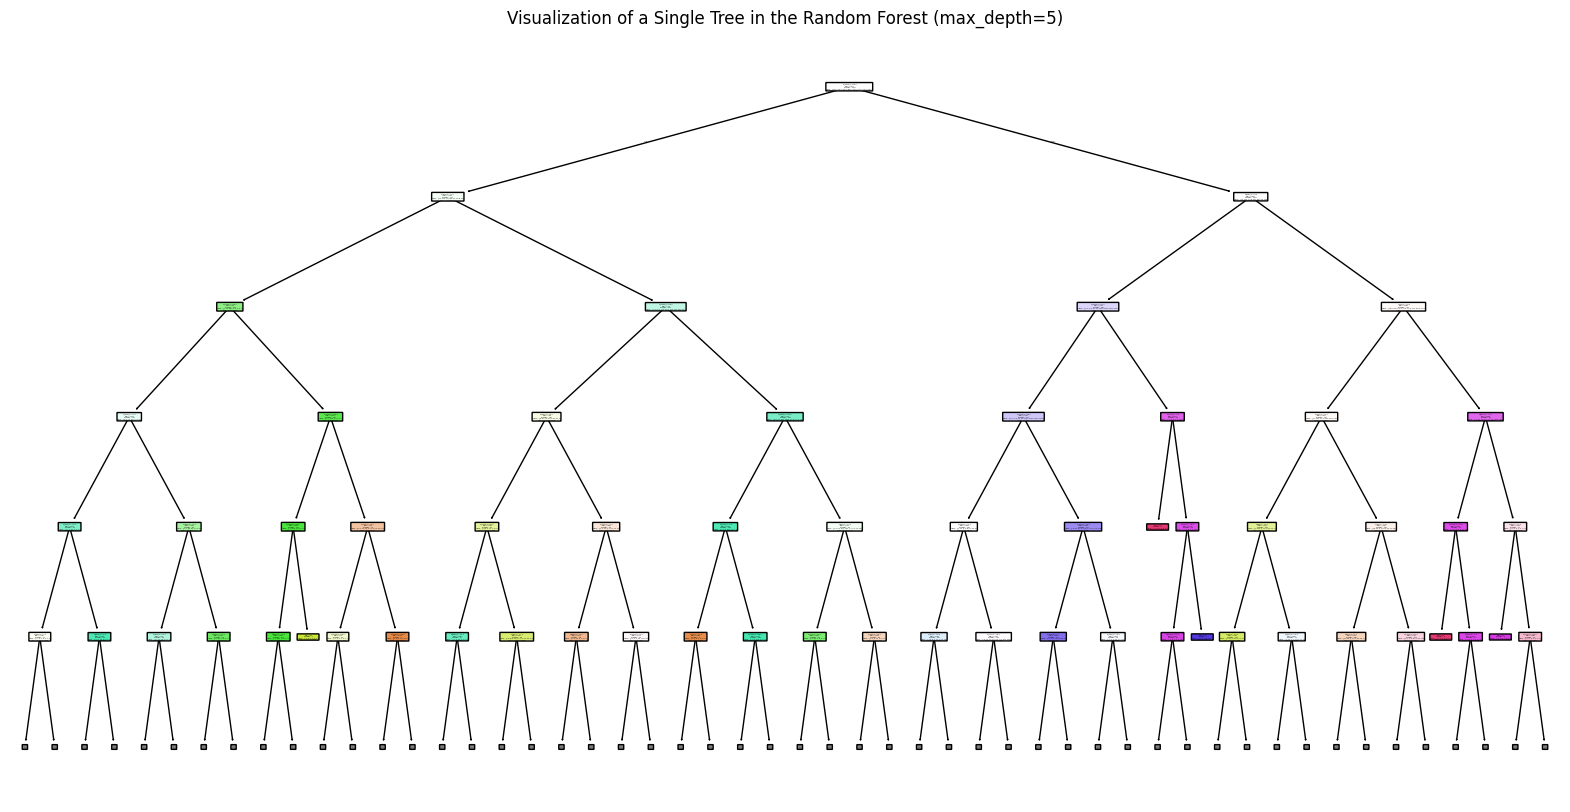

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train the Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Select a single tree from the Random Forest
tree = rf_clf.estimators_[0]  # You can change the index to view other trees

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=None, class_names=np.unique(y_train), rounded=True, max_depth=5)
plt.title("Visualization of a Single Tree in the Random Forest (max_depth=5)")
plt.show()

# Model Evaluation

Classification Report for Decision Tree:

                  precision    recall  f1-score   support

     Anthracnose       0.70      0.66      0.68        91
Bacterial Canker       0.73      0.72      0.73       112
  Cutting Weevil       0.91      0.96      0.93       101
        Die Back       0.80      0.81      0.80       104
      Gall Midge       0.46      0.49      0.48        93
         Healthy       0.74      0.62      0.67        90
  Powdery Mildew       0.57      0.65      0.61        86
     Sooty Mould       0.60      0.57      0.58       123

        accuracy                           0.69       800
       macro avg       0.69      0.69      0.69       800
    weighted avg       0.69      0.69      0.69       800

Classification Report for Random Forest:

                  precision    recall  f1-score   support

     Anthracnose       0.87      0.95      0.91        91
Bacterial Canker       0.86      0.86      0.86       112
  Cutting Weevil       0.99      1.00     

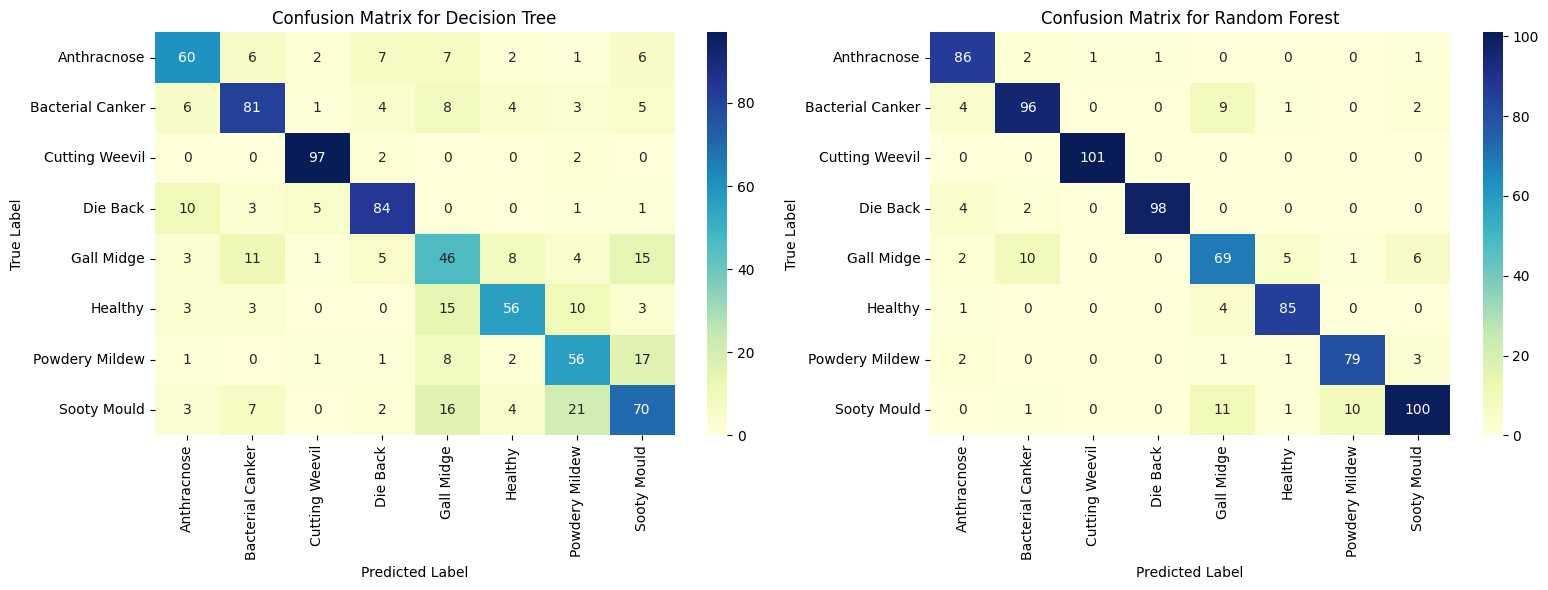

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming clf is the Decision Tree model and rf_clf is the Random Forest model
# Predictions
y_pred_dt = clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

# Unique classes for label names
unique_classes = np.unique(y_test)

### 1. Classification Reports ###
print("Classification Report for Decision Tree:\n")
print(classification_report(y_test, y_pred_dt, target_names=unique_classes.astype(str)))

print("Classification Report for Random Forest:\n")
print(classification_report(y_test, y_pred_rf, target_names=unique_classes.astype(str)))

### 2. Overall Accuracy ###
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Accuracy of Decision Tree: {accuracy_dt:.2f}")
print(f"Accuracy of Random Forest: {accuracy_rf:.2f}")

### 3. Confusion Matrix Heatmaps ###
# Decision Tree Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Decision Tree heatmap
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=unique_classes, yticklabels=unique_classes, ax=axes[0])
axes[0].set_title("Confusion Matrix for Decision Tree")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Random Forest heatmap
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=unique_classes, yticklabels=unique_classes, ax=axes[1])
axes[1].set_title("Confusion Matrix for Random Forest")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

### 4. ROC-AUC (for binary or multi-class with each class vs rest) ###
# Note: Only applicable for binary or multi-class classification with one-vs-rest approach
# For binary classification
if len(unique_classes) == 2:
    auc_dt = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    auc_rf = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])
    print(f"ROC-AUC of Decision Tree: {auc_dt:.2f}")
    print(f"ROC-AUC of Random Forest: {auc_rf:.2f}")


# Overall Accuracy

*   Decision Tree achieved an accuracy of 69%, while Random Forest performed significantly better with an accuracy of 89%.
*   This suggests that Random Forest captures the complexities of the data more effectively than a single Decision Tree, which may be overfitting to certain patterns in the training data without generalizing well.










# Summary Comparison


*   **Random Forest:** Generally has better accuracy and AUC as it reduces overfitting by averaging multiple decision trees. Tends to perform better on complex data.
*   **Decision Tree:** Simpler and more interpretable but may overfit, especially on complex or high-dimensional data.


Overall, the Random Forest model substantially outperformed the Decision Tree across all metrics. This can be attributed to the Random Forest's ensemble nature, which reduces overfitting and better captures complex patterns in the dataset. The Random Forest model's higher precision, recall, and f1-scores across almost all classes indicate that it provides more reliable and consistent performance, making it a preferable choice for this dataset.